SpaCy:
*   SpaCy is a free open source library for  Advanced NLP in Python
*   It is designed specifically for production use and helps to build applications that process and understand large volumns of text.
*   SpaCy is neither a platform nor "an API"and Chatbot engine. 
*   SpaCy is neither a company nor  research software.





---



Features of SpaCy:


1.   Tokenization
1.   Parts of Speech Tagging
1.   Dependency Parsing
1.   Lemmatization
1.   Sentence Boundary Detection
2.   Named Entity Recognition
2.   Entity Linking
2.   Similarity
2.   Text Classification
2.   Rule based Matching
1.   Training
2.   Serialization


> Powerful Feature of SpaCy is Pipeline.All features could be included in the pipeline to take input at the start and to give output at the end.



spacy-transformers: 
*   Use pretrained transformers like BERT, XLNet and GPT-2 in spaCy
*   This package provides spaCy components and architectures to use transformer models via Hugging Face's transformers in spaCy.
*   This can be used to use pretrained models in SpaCy pipelines.
*   Can Use SpaCy Package Command to build pip packages that provides weight,entry points and all the requirements.
*   Can download and load the transformer based models with the same workflow as our other model packages.
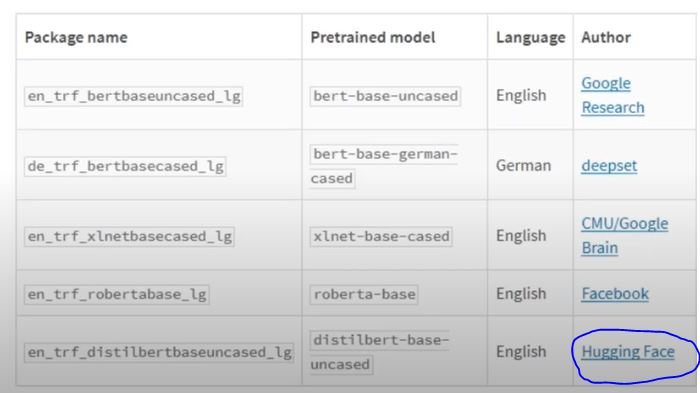


> For More information:
https://explosion.ai/blog/spacy-transformers 


SpaCy Transformer Pipeline:

> 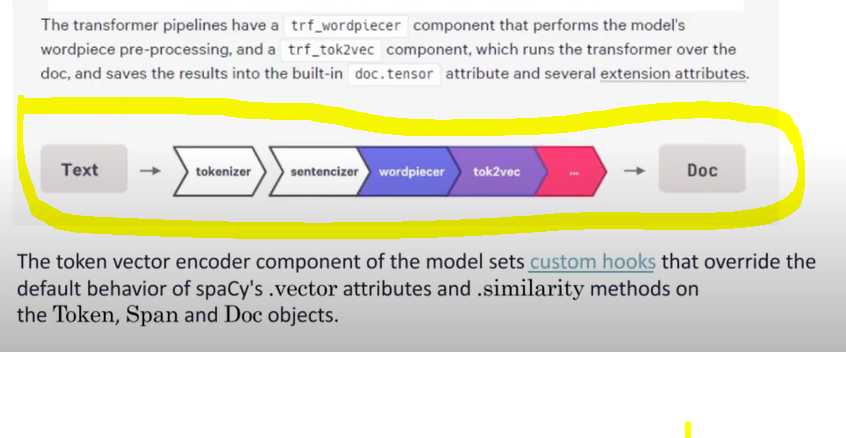



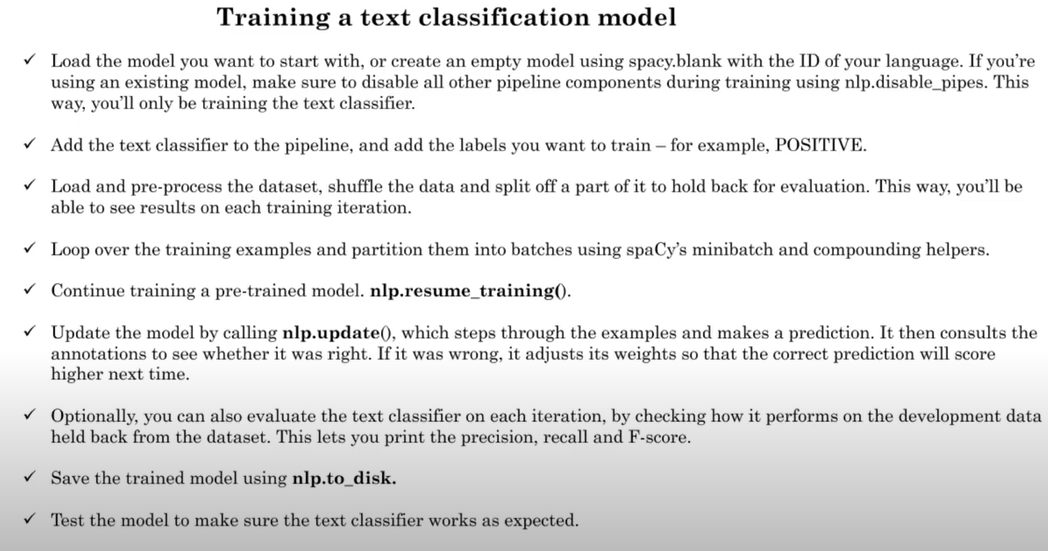

# Text Classification on kaggle tweet sentiment extraction data

In [1]:
#Understanding the data:
import pandas as pd
Data = pd.read_csv('/content/drive/MyDrive/Tweet sentiment.csv')

In [2]:
Data.shape

(27481, 4)

In [3]:
Data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
!pip install transformers

     |████████████████████████████████| 2.5MB 30.6MB/s 
     |████████████████████████████████| 3.3MB 44.7MB/s 
     |████████████████████████████████| 901kB 43.8MB/s 


In [5]:
!pip install spacy-transformers

     |████████████████████████████████| 1.0MB 38.7MB/s 
     |████████████████████████████████| 460kB 52.2MB/s 
     |████████████████████████████████| 6.4MB 50.8MB/s 
     |████████████████████████████████| 2.3MB 29.4MB/s 
     |████████████████████████████████| 624kB 45.1MB/s 
     |████████████████████████████████| 51kB 10.1MB/s 
     |████████████████████████████████| 10.1MB 43.7MB/s 
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
  Found existing installation: huggingface-hub 0.0.12
    Uninstalling huggingface-hub-0.0.12:
      Successfully uninstalled huggin

In [6]:
#Import all required libraries
import spacy
import random
import time
import numpy as np
import re
import string


import sys
from spacy import displacy

from tqdm.auto import tqdm             #Progress bar
from spacy.tokens import DocBin        
#The DocBin class lets you efficiently serialize the information from a collection of Doc objects.
#The DocBin is faster and produces smaller data sizes than pickle.
#Simply DocBin is spacys new way to store Docs in a binary format for training later

In [7]:
!pip install -U pip setuptools wheel
!pip install -U spacy[transformers,lookups]
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 1.6MB 38.8MB/s 
     |████████████████████████████████| 819kB 47.8MB/s 
Requirement already up-to-date: wheel in /usr/local/lib/python3.7/dist-packages (0.36.2)
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0


     |████████████████████████████████| 97.3 MB 99 kB/s 
2021-07-09 12:06:08.687196: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 460.2 MB 9.2 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [8]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [9]:
!pip install -U spacy[cuda110]

     |████████████████████████████████| 169.2 MB 24 kB/s 


In [10]:
gpu = spacy.prefer_gpu()
print('GPU:', gpu)

GPU: True


In [11]:
                                                       #Tweets - Pre Processing>>>>>>>>>>>>
# Step 1:To remove emoji of all type:
#refer: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Step2:To remove url from tweet
def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)

# converting return value from list to string    
#Step3:To remove special characters and return lower case of tokens with character>3
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)   
    #print('cleaned:'+text1)
    textArr= text1.split() # Tokenization
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
# 'w' indicates here not a word but the character    
    return text2.lower()

Building the Model

In [12]:
def make_docs(file_path):
    """
    this will take a list of texts and labels 
    and transform them in spacy documents
    
    data: list(tuple(text, label))
    
    returns: List(spacy.Doc.doc)
    """
    train_data = pd.read_csv(file_path)
    train_data.dropna(axis = 0, how ='any',inplace=True) #Checking null and drop those
    train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split())) 
    #Count the words or tokens
    mask = train_data['Num_words_text'] >2
    #Mask is here to take the text with threshold of minimum 2 tokens
    train_data = train_data[mask]
    print(train_data['sentiment'].value_counts())
    #Apply preprocessors
    train_data['text'] = train_data['text'].apply(remove_emoji)
    train_data['text'] = train_data['text'].apply(remove_url)
    train_data['text'] = train_data['text'].apply(clean_text)
    #Zip in the format where cleaned text and sentiment comes as tuple
    data = tuple(zip(train_data['text'].tolist(), train_data['sentiment'].tolist())) 
    print(data[1]) #Check yourself 
    docs = [] # For to convert into DocBin
    # nlp.pipe([texts]) is way faster than running 
    # nlp(text) for each text
    # as_tuples allows us to pass in a tuple, 
    # the first one is treated as text
    # the second one will get returned as it is.
    nlp = spacy.load("en_core_web_trf")
    for doc, label in tqdm(nlp.pipe(data, as_tuples=True), total = len(data)):
        
        # we need to set the (text)cat(egory) for each document
        #print(label)
        if (label=='positive'):
            doc.cats['positive'] = 1
            doc.cats['negative'] = 0
            doc.cats['neutral']  = 0
        elif (label=='negative'):
            doc.cats['positive'] = 0
            doc.cats['negative'] = 1
            doc.cats['neutral']  = 0
        else:
            doc.cats['positive'] = 0
            doc.cats['negative'] = 0
            doc.cats['neutral']  = 1
        #print(doc.cats)
        
        # put them into a nice list
        docs.append(doc)
    
    return docs,train_data

Convert train data and test data to spaCy format

In [13]:
train_docs,train_data  = make_docs("/content/drive/MyDrive/Tweet Sentiment/train.csv")
# then we save it in a binary file to disc
doc_bin = DocBin(docs=train_docs)
doc_bin.to_disk("./textcat_train.spacy")

test_docs,test_data  = make_docs("/content/drive/MyDrive/Tweet Sentiment/test.csv")
# then we save it in a binary file to disc
doc_bin = DocBin(docs=test_docs)
doc_bin.to_disk("./textcat_valid.spacy") 

neutral     10704
positive     8375
negative     7673
Name: sentiment, dtype: int64
('sooo will miss here diego', 'negative')



neutral     1376
positive    1075
negative     983
Name: sentiment, dtype: int64
('shanghai also really exciting precisely skyscrapers galore good tweeps china', 'positive')


Model Training:

In [14]:
#Create base config file>>>>>>>>>>>
#For More information: https://spacy.io/usage/training#quickstart
# Step 1:
!python -m spacy init fill-config ./base_config.cfg ./config.cfg
#base_config.cfg that could be downloaded from spacy.io
#Downloaded .cfg is then place into program running directory of disk
#Which is then produce config.cfg after code execution 
#I particularly altered the epoch as 2 in config.cfg as I dont have full day (Poor PC) 
#The Altered config.cfg is then replaced with the existing one at disk
#I altered config.cfg by VS code editer

2021-07-09 12:13:21.031587: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [15]:
#Step2:
!python -m spacy train config.cfg --verbose --output ./output --paths.train ./textcat_train.spacy --paths.dev ./textcat_valid.spacy

2021-07-09 12:15:28.648325: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Created output directory: output
[2021-07-09 12:15:30,049] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2021-07-09 12:15:30,775] [INFO] Set up nlp object from config
[2021-07-09 12:15:30,784] [DEBUG] Loading corpus from path: textcat_valid.spacy
[2021-07-09 12:15:30,785] [DEBUG] Loading corpus from path: textcat_train.spacy
[2021-07-09 12:15:30,785] [INFO] Pipeline: ['transformer', 'textcat']
[2021-07-09 12:15:30,790] [INFO] Created vocabulary
[2021-07-09 12:15:30,791] [INFO] Finished initializing nlp object
Downloading: 100% 481/481 [00:00<00:00, 532kB/s]
Downloading: 100% 899k/899k [00:00<00:00, 49.6MB/s]
Downloading: 100% 456k/456k [00:00<00:00, 38.8MB/s]
Downloading: 100% 1.36M/1.36M [00:00<00:00, 37.2MB/s]
Downloading: 100% 50

Evaluation 

In [16]:
import spacy
#test the model on test data
nlp_textcat = spacy.load("/content/output/model-best")
test_texts = test_data['text'].tolist()
test_cats = test_data['sentiment'].tolist()
doc2 = nlp_textcat(test_texts[250])
print("Text: "+ test_texts[250])
print("Orig Cat:"+ test_cats[250])
print(" Predicted Cats:") 
print(doc2.cats)
print("=======================================")
doc2 = nlp_textcat(test_texts[1500])
print("Text: "+ test_texts[1500])
print(" Orig Cat:"+test_cats[1500])
print(" Predicted Cats:") 
print(doc2.cats)

Text: lots tasks complete today first wecloming members canadamigos social networking site wwwcanadamigoscom coffee
Orig Cat:positive
 Predicted Cats:
{'positive': 0.22437241673469543, 'negative': 0.14568071067333221, 'neutral': 0.6299468874931335}
Text: wish could head
 Orig Cat:positive
 Predicted Cats:
{'positive': 0.2758091390132904, 'negative': 0.12876933813095093, 'neutral': 0.5954214930534363}


In [17]:
doc2 = nlp_textcat("Food is hideous and horrible but my child likes it")
print(doc2.cats)

{'positive': 0.0575978085398674, 'negative': 0.7561823725700378, 'neutral': 0.18621976673603058}


In [18]:
doc2 = nlp_textcat("Working in multi National Company is pretty much hectic but remuneration is solid")
print(doc2.cats)

{'positive': 0.795362651348114, 'negative': 0.044495828449726105, 'neutral': 0.16014151275157928}




> If the model would have trained with more than 5 epoch, best model would have been found with good accuracy.


> And the work here is to show and prove the methodology in SpaCy-Transformers and its execution at Google colab.


> Further Work would be based on fine tuning the model for best performance.





